In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
from matplotlib import pyplot as plt

In [2]:
salaries = pd.read_csv('Resources/salaries_06302020_high_school.csv')
schools = pd.read_csv('Resources/School_Progress_Reports_SY1819_retention_rts.csv', encoding='iso-8859-1')
combined_df = pd.merge(salaries, schools, on = "School_ID", how = "left")
combined_df.columns.tolist()

['Pos #',
 'Dept ID',
 'School_ID',
 'Department',
 'FTE',
 'ClsIndc',
 'Annual Salary',
 'FTE Annual Salary',
 'Annual Benefit Cost',
 'JobCode',
 'Job Title',
 'Name',
 'Teacher_Retention',
 'Short_Name',
 'Long_Name',
 'School_Type',
 'Primary_Category',
 'Address',
 'City',
 'State',
 'Zip',
 'Phone',
 'Fax',
 'CPS_School_Profile',
 'Website',
 'Progress_Report_Year',
 'Blue_Ribbon_Award_Year',
 'Excelerate_Award_Gold_Year',
 'Spot_Light_Award_Year',
 'Improvement_Award_Year',
 'Excellence_Award_Year',
 'Student_Growth_Rating',
 'Student_Growth_Description',
 'Growth_Reading_Grades_Tested_Pct_ES',
 'Growth_Reading_Grades_Tested_Label_ES',
 'Growth_Math_Grades_Tested_Pct_ES',
 'Growth_Math_Grades_Tested_Label_ES',
 'Student_Attainment_Rating',
 'Student_Attainment_Description',
 'Attainment_Reading_Pct_ES',
 'Attainment_Reading_Lbl_ES',
 'Attainment_Math_Pct_ES',
 'Attainment_Math_Lbl_ES',
 'Culture_Climate_Rating',
 'Culture_Climate_Description',
 'School_Survey_Student_Response_Ra

# Is performance different at Charter Schools?

In [3]:
schools.groupby(schools["School_Type"]).count()

,School_ID,Teacher_Retention,Short_Name,Long_Name,Primary_Category,Address,City,State,Zip,Phone,...,Attainment_SAT_Grade_11_School_Pct,Attainment_SAT_Grade_11_School_Lbl,Attainment_All_Grades_School_Pct,Attainment_All_Grades_School_Lbl,Growth_PSAT_Math_Grade_10_School_Pct,Growth_PSAT_Math_Grade_10_School_Lbl,Growth_SAT_Reading_Grade_11_School_Pct,Growth_SAT_Reading_Grade_11_School_Lbl,Growth_SAT_Math_Grade_11_School_Pct,Growth_SAT_Math_Grade_11_School_Lbl
School_Type,,,,,,,,,,,,,,,,,,,,,
Charter,65,55,65,65,65,65,65,65,65,65,...,60,60,63,63,41,41,41,41,41,41
Magnet,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,6,6,7,7,7,7
Neighborhood,46,44,46,46,46,46,46,46,46,46,...,44,44,45,45,45,45,44,44,44,44
Selective enrollment,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11


In [4]:
#partition data to creat df with only high school data
high_school_data1 = schools.loc[(schools['Primary_Category']== "HS")]
Charter_high = high_school_data1.loc[(high_school_data1['School_Type']== "Charter")]
#partition data to creat df with only high school data
Neighborhood_high = high_school_data1.loc[(high_school_data1['School_Type']== "Neighborhood")]

In [5]:
One_df = combined_df[[ 'Department' , 'Teacher_Retention', 'Attainment_SAT_Grade_11_School_Pct']]
One_df = One_df.dropna()
One_df = One_df.loc[One_df["Teacher_Retention"] != 'NAN']
One_df['Teacher_Retention'] = pd.to_numeric(One_df['Teacher_Retention'])
One_df['Teacher_Retention'].mean()

0.8747700882489265

In [6]:

Neighborhood_high


,School_ID,Teacher_Retention,Short_Name,Long_Name,School_Type,Primary_Category,Address,City,State,Zip,...,Attainment_SAT_Grade_11_School_Pct,Attainment_SAT_Grade_11_School_Lbl,Attainment_All_Grades_School_Pct,Attainment_All_Grades_School_Lbl,Growth_PSAT_Math_Grade_10_School_Pct,Growth_PSAT_Math_Grade_10_School_Lbl,Growth_SAT_Reading_Grade_11_School_Pct,Growth_SAT_Reading_Grade_11_School_Lbl,Growth_SAT_Math_Grade_11_School_Pct,Growth_SAT_Math_Grade_11_School_Lbl
6,610563,0.89,BACK OF THE YARDS HS,Back of the Yards IB HS,Neighborhood,HS,2111 W 47TH ST,Chicago,Illinois,60609,...,46.2,46.2,57.3,57.3,13.0,13th,32.0,32nd,32.0,32nd
7,609764,0.91,JUAREZ HS,Benito Juarez Community Academy High School,Neighborhood,HS,1450 W CERMAK RD,Chicago,Illinois,60608,...,11.6,11.6,19.5,19.5,5.0,5th,50.0,50th,50.0,50th
8,609729,0.86,SCHURZ HS,Carl Schurz High School,Neighborhood,HS,3601 N MILWAUKEE AVE,Chicago,Illinois,60641,...,19.6,19.6,24.7,24.7,31.0,31st,66.0,66th,37.0,37th
9,609732,0.91,STEINMETZ HS,Charles P Steinmetz College Preparatory HS,Neighborhood,HS,3030 N MOBILE AVE,Chicago,Illinois,60634,...,19.3,19.3,21.4,21.4,31.0,31st,50.0,50th,37.0,37th
14,609705,0.83,FENGER HS,Christian Fenger Academy High School,Neighborhood,HS,11220 S WALLACE ST,Chicago,Illinois,60628,...,5.1,5.1,4.9,4.9,19.0,19th,65.0,65th,38.0,38th
19,609704,0.83,FARRAGUT HS,David G Farragut Career Academy High School,Neighborhood,HS,2345 S CHRISTIANA AVE,Chicago,Illinois,60623,...,16.3,16.3,19.6,19.6,31.0,31st,34.0,34th,50.0,50th
23,609735,0.84,TILDEN HS,Edward Tilden Career Community Academy HS,Neighborhood,HS,4747 S UNION AVE,Chicago,Illinois,60609,...,5.1,5.1,9.2,9.2,16.0,16th,64.0,64th,63.0,63rd
24,609708,0.76,FOREMAN HS,Edwin G. Foreman College and Career Academy,Neighborhood,HS,3235 N LECLAIRE AVE,Chicago,Illinois,60641,...,14.0,14.0,12.1,12.1,31.0,31st,34.0,34th,50.0,50th
25,609682,0.75,RICHARDS HS,Ellen H Richards Career Academy High School,Neighborhood,HS,5009 S LAFLIN ST,Chicago,Illinois,60609,...,6.7,6.7,9.6,9.6,32.0,32nd,64.0,64th,50.0,50th
26,609712,0.73,HIRSCH HS,Emil G Hirsch Metropolitan High School,Neighborhood,HS,7740 S INGLESIDE AVE,Chicago,Illinois,60619,...,2.9,2.9,2.1,2.1,2.0,2nd,36.0,36th,36.0,36th


## Attainment in Neighborhood Schools v Salary
Does Teacher Salary predict test scores?
# Hypotheses
Null Hypothesis: Teacher Salary will have no effect on Test Scores.
Alternative Hypothesis: Teacher Salary doesn't have no effect on Test Scores.

The correlation is 0.25529770106550764


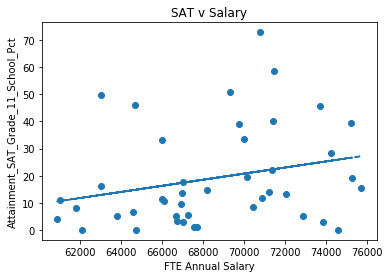

In [7]:
#11th Grade Data
#Make 11th grade_df
ele_df = combined_df[[ 'Department' , 'FTE Annual Salary', 'Attainment_SAT_Grade_11_School_Pct']]
cleaned_df = ele_df.dropna()
x_values = cleaned_df.groupby(cleaned_df['Department']).mean()['FTE Annual Salary']
y_values = cleaned_df.groupby(cleaned_df['Department']).mean()['Attainment_SAT_Grade_11_School_Pct']
plt.scatter(x_values, y_values)
plt.xlabel('FTE Annual Salary')
plt.ylabel('Attainment_SAT_Grade_11_School_Pct')
plt.title('SAT v Salary')
# Perform a linear regression on Annual Salary versus 11th Grade SAT Attainment
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(x_values, y_values)
# Create equation of line to calculate predicted 11th Grade SAT Attainment
vc_fit = vc_slope * x_values + vc_int
#plot regression line
plt.plot(x_values,vc_fit,"--")

correlation = st.pearsonr(x_values, y_values)
print(f'The correlation is {correlation[0]}')

The correlation is 0.24210084279894326


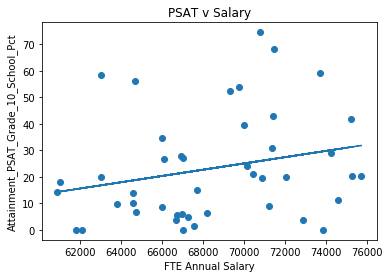

In [8]:
#10th Grade Data
#Make 11th grade_df
ele_df = combined_df[[ 'Department' , 'FTE Annual Salary', 'Attainment_PSAT_Grade_10_School_Pct']]
cleaned_df = ele_df.dropna()
x_values = cleaned_df.groupby(cleaned_df['Department']).mean()['FTE Annual Salary']
y_values = cleaned_df.groupby(cleaned_df['Department']).mean()['Attainment_PSAT_Grade_10_School_Pct']
plt.scatter(x_values, y_values)
plt.xlabel('FTE Annual Salary')
plt.ylabel('Attainment_PSAT_Grade_10_School_Pct')
plt.title('PSAT v Salary')
# Perform a linear regression on Annual Salary versus 11th Grade SAT Attainment
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(x_values, y_values)
# Create equation of line to calculate predicted 11th Grade SAT Attainment
vc_fit = vc_slope * x_values + vc_int
#plot regression line
plt.plot(x_values,vc_fit,"--")

correlation = st.pearsonr(x_values, y_values)
print(f'The correlation is {correlation[0]}')

The correlation is 0.266312664503844


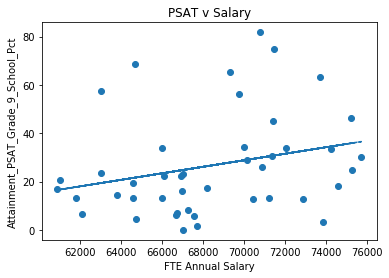

In [9]:
# 9th grade data
ten_df = combined_df[[ 'Department' , 'FTE Annual Salary', 'Attainment_PSAT_Grade_9_School_Pct']]
cleaned_df = ten_df.dropna()
x_values = cleaned_df.groupby(cleaned_df['Department']).mean()['FTE Annual Salary']
y_values = cleaned_df.groupby(cleaned_df['Department']).mean()['Attainment_PSAT_Grade_9_School_Pct']
plt.scatter(x_values, y_values)
plt.xlabel('FTE Annual Salary')
plt.ylabel('Attainment_PSAT_Grade_9_School_Pct')
plt.title('PSAT v Salary')
# Perform a linear regression on Annual Salary versus 11th Grade SAT Attainment
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(x_values, y_values)
# Create equation of line to calculate predicted 11th Grade SAT Attainment
vc_fit = vc_slope * x_values + vc_int
#plot regression line
plt.plot(x_values,vc_fit,"--")

correlation = st.pearsonr(x_values, y_values)
print(f'The correlation is {correlation[0]}')

# Will teacher salaries predict college enrollment?

The correlation is 0.33393621892822506


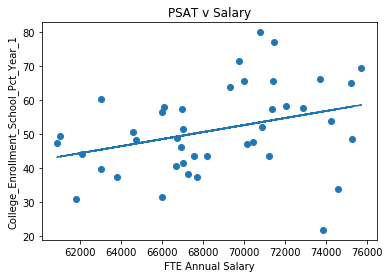

In [10]:
# 9th grade data
ten_df = combined_df[[ 'Department' , 'FTE Annual Salary', 'College_Enrollment_School_Pct_Year_1']]
cleaned_df = ten_df.dropna()
x_values = cleaned_df.groupby(cleaned_df['Department']).mean()['FTE Annual Salary']
y_values = cleaned_df.groupby(cleaned_df['Department']).mean()['College_Enrollment_School_Pct_Year_1']
plt.scatter(x_values, y_values)
plt.xlabel('FTE Annual Salary')
plt.ylabel('College_Enrollment_School_Pct_Year_1')
plt.title('PSAT v Salary')
# Perform a linear regression on Annual Salary versus 11th Grade SAT Attainment
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(x_values, y_values)
# Create equation of line to calculate predicted 11th Grade SAT Attainment
vc_fit = vc_slope * x_values + vc_int
#plot regression line
plt.plot(x_values,vc_fit,"--")

correlation = st.pearsonr(x_values, y_values)
print(f'The correlation is {correlation[0]}')

The correlation is 0.27395680149073537


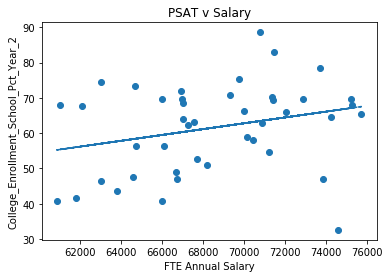

In [11]:
# 9th grade data
ten_df = combined_df[[ 'Department' , 'FTE Annual Salary', 'College_Enrollment_School_Pct_Year_2']]
cleaned_df = ten_df.dropna()
x_values = cleaned_df.groupby(cleaned_df['Department']).mean()['FTE Annual Salary']
y_values = cleaned_df.groupby(cleaned_df['Department']).mean()['College_Enrollment_School_Pct_Year_2']
plt.scatter(x_values, y_values)
plt.xlabel('FTE Annual Salary')
plt.ylabel('College_Enrollment_School_Pct_Year_2')
plt.title('PSAT v Salary')
# Perform a linear regression on Annual Salary versus 11th Grade SAT Attainment
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(x_values, y_values)
# Create equation of line to calculate predicted 11th Grade SAT Attainment
vc_fit = vc_slope * x_values + vc_int
#plot regression line
plt.plot(x_values,vc_fit,"--")

correlation = st.pearsonr(x_values, y_values)
print(f'The correlation is {correlation[0]}')

# Will teacher salaries predict graduation rates?

The correlation is 0.3022533224046131


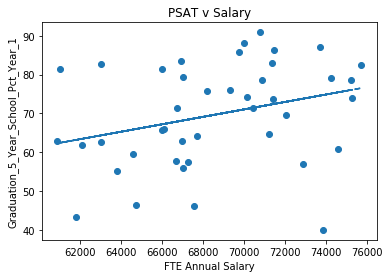

In [12]:
ten_df = combined_df[[ 'Department' , 'FTE Annual Salary', 'Graduation_5_Year_School_Pct_Year_1']]
cleaned_df = ten_df.dropna()
x_values = cleaned_df.groupby(cleaned_df['Department']).mean()['FTE Annual Salary']
y_values = cleaned_df.groupby(cleaned_df['Department']).mean()['Graduation_5_Year_School_Pct_Year_1']
plt.scatter(x_values, y_values)
plt.xlabel('FTE Annual Salary')
plt.ylabel('Graduation_5_Year_School_Pct_Year_1')
plt.title('PSAT v Salary')
# Perform a linear regression on Annual Salary versus 11th Grade SAT Attainment
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(x_values, y_values)
# Create equation of line to calculate predicted 11th Grade SAT Attainment
vc_fit = vc_slope * x_values + vc_int
#plot regression line
plt.plot(x_values,vc_fit,"--")

correlation = st.pearsonr(x_values, y_values)
print(f'The correlation is {correlation[0]}')

The correlation is 0.3067644356757489


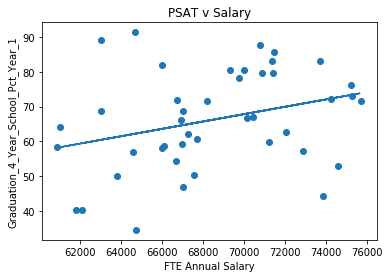

In [13]:
ten_df = combined_df[[ 'Department' , 'FTE Annual Salary', 'Graduation_4_Year_School_Pct_Year_1']]
cleaned_df = ten_df.dropna()
x_values = cleaned_df.groupby(cleaned_df['Department']).mean()['FTE Annual Salary']
y_values = cleaned_df.groupby(cleaned_df['Department']).mean()['Graduation_4_Year_School_Pct_Year_1']
plt.scatter(x_values, y_values)
plt.xlabel('FTE Annual Salary')
plt.ylabel('Graduation_4_Year_School_Pct_Year_1')
plt.title('PSAT v Salary')
# Perform a linear regression on Annual Salary versus 11th Grade SAT Attainment
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(x_values, y_values)
# Create equation of line to calculate predicted 11th Grade SAT Attainment
vc_fit = vc_slope * x_values + vc_int
#plot regression line
plt.plot(x_values,vc_fit,"--")

correlation = st.pearsonr(x_values, y_values)
print(f'The correlation is {correlation[0]}')

# Will teacher retention predict student performance?

In [14]:
combined_df.to_csv("output_data/combined.csv", encoding="utf-8", index=False)

The correlation is 0.6799207681031213


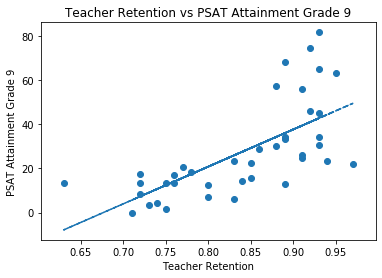

In [61]:
wlh1=combined_df[['Department','Teacher_Retention','Attainment_PSAT_Grade_9_School_Pct']]
wlh_clean=wlh1.dropna()
wlh_clean.dtypes

wlh_clean=wlh_clean.loc[(wlh_clean['Teacher_Retention']!='NAN')]
wlh_clean['Teacher_Retention'] = pd.to_numeric(wlh_clean['Teacher_Retention'])
wlh_clean

x_values = wlh_clean.groupby(['Department']).mean()['Teacher_Retention']
y_values = wlh_clean.groupby(['Department']).mean()['Attainment_PSAT_Grade_9_School_Pct']
plt.scatter(x_values, y_values)
plt.xlabel('Teacher Retention')
plt.ylabel('PSAT Attainment Grade 9')
plt.title('Teacher Retention vs PSAT Attainment Grade 9')

# Perform a linear regression on Teacher Retention vs 9th Grade PSAT Attainment

vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(x_values, y_values)

# Create equation of line to calculate predicted 9th Grade PSAT Attainment
vc_fit = vc_slope * x_values + vc_int

#plot regression line
plt.plot(x_values,vc_fit,"--")

correlation = st.pearsonr(x_values, y_values)
print(f'The correlation is {correlation[0]}')  

The correlation is 0.7170966654956554


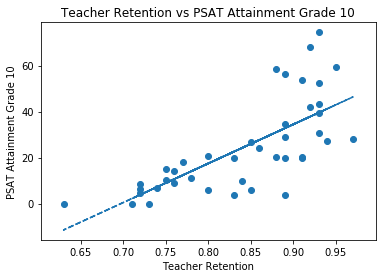

In [63]:
wlh2=combined_df[['Department','Teacher_Retention','Attainment_PSAT_Grade_10_School_Pct']]
wlh_clean2=wlh2.dropna()

wlh_clean2=wlh_clean2.loc[(wlh_clean2['Teacher_Retention']!='NAN')]
wlh_clean2['Teacher_Retention'] = pd.to_numeric(wlh_clean2['Teacher_Retention'])

x_values = wlh_clean2.groupby(['Department']).mean()['Teacher_Retention']
y_values = wlh_clean2.groupby(['Department']).mean()['Attainment_PSAT_Grade_10_School_Pct']
plt.scatter(x_values, y_values)
plt.xlabel('Teacher Retention')
plt.ylabel('PSAT Attainment Grade 10')
plt.title('Teacher Retention vs PSAT Attainment Grade 10')

# Perform a linear regression on Teacher Retention vs 10th Grade PSAT Attainment

vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(x_values, y_values)

# Create equation of line to calculate predicted 10th Grade PSAT Attainment
vc_fit = vc_slope * x_values + vc_int

#plot regression line
plt.plot(x_values,vc_fit,"--")

correlation = st.pearsonr(x_values, y_values)
print(f'The correlation is {correlation[0]}')  

The correlation is 0.633491053336498


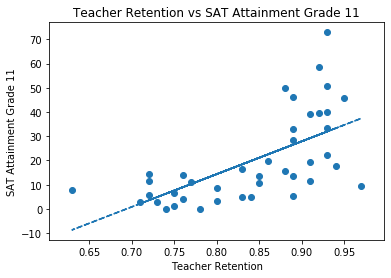

In [70]:
wlh3=combined_df[['Department','Teacher_Retention','Attainment_SAT_Grade_11_School_Pct']]
wlh_clean3=wlh3.dropna()

wlh_clean3=wlh_clean3.loc[(wlh_clean3['Teacher_Retention']!='NAN')]
wlh_clean3['Teacher_Retention'] = pd.to_numeric(wlh_clean3['Teacher_Retention'])

x_values = wlh_clean3.groupby(['Department']).mean()['Teacher_Retention']
y_values = wlh_clean3.groupby(['Department']).mean()['Attainment_SAT_Grade_11_School_Pct']
plt.scatter(x_values, y_values)
plt.xlabel('Teacher Retention')
plt.ylabel('SAT Attainment Grade 11')
plt.title('Teacher Retention vs SAT Attainment Grade 11')

# Perform a linear regression on Teacher Retention vs 11th Grade PSAT Attainment

vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(x_values, y_values)

# Create equation of line to calculate predicted 11th Grade PAT Attainment
vc_fit = vc_slope * x_values + vc_int

#plot regression line
plt.plot(x_values,vc_fit,"--")

correlation = st.pearsonr(x_values, y_values)
print(f'The correlation is {correlation[0]}')  

In [ ]:
Math11 = combined_df.groupby(combined_df['Department']).mean()['Teacher_Attendance_Year_1_Pct']
Math11

In [ ]:
Read11 = combined_df.groupby(combined_df['Department']).mean()['Growth_SAT_Reading_Grade_11_School_Pct']
Read11

In [ ]:
plt.scatter(x_values, Read11)

In [ ]:
Charter_high["Attainment_SAT_Grade_11_School_Pct"].var()

In [ ]:
Charter_high["Attainment_SAT_Grade_11_School_Pct"].mean()

In [ ]:
Neighborhood_high["Attainment_SAT_Grade_11_School_Pct"].mean()

In [ ]:
critical_value = stats.chi2.ppf(q = 0.95, df = 1)
critical_value

In [ ]:
# Run the chi square test with stats.chisquare()
stats.chisquare(20.971,19.505)

In [ ]:
Charter_high["Growth_SAT_Math_Grade_11_School_Pct"].mean()

In [ ]:
Neighborhood_high["Growth_SAT_Math_Grade_11_School_Pct"].mean()

In [ ]:
Neighborhood_high["Growth_SAT_Reading_Grade_11_School_Pct"].mean()

In [ ]:
Charter_high["Growth_SAT_Reading_Grade_11_School_Pct"].mean()

In [ ]:
# # Start by getting the last (greatest) timepoint for each mouse
# grouped_Max = drug_data.groupby('Mouse ID')
# Maxes = grouped_Max['Timepoint'].max()
# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Max_Vol = pd.merge(Maxes, drug_data, on=['Mouse ID', 'Timepoint'], how='left')
# Max_Vol

In [ ]:
# Using GroupBy in order to separate the data into fields according to school name
grouped2school_school_df = combined062020_df.groupby(['School_ID', 'Long_Name', 'Job Title'])
# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped2school_school_df)
# In order to be visualized, a data function must be used...
grouped2school_school_df.count()